In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

title  year
0                  Mademoiselle  1982
1               This Is the End  2013
2    The End Came After Zombies  2016
3                   The Godsend  1980
4  La estrella de Sierra Morena  1952

In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

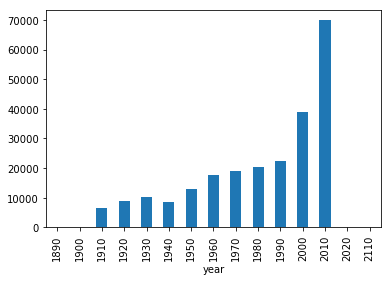

In [10]:
td = titles
td.year = titles.year.map(lambda x: x // 10 * 10)
td.groupby("year").size().plot(kind = "bar")

### Use groupby() to plot the number of "Hamlet" films made each decade.

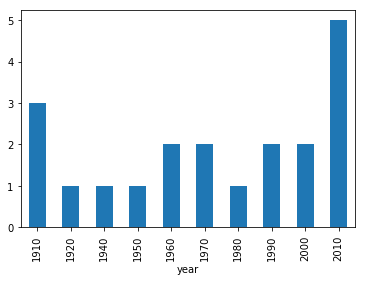

In [13]:
td = titles
td.year = titles.year.map(lambda x: x // 10 * 10)
td[td.title == "Hamlet"].groupby("year").size().plot(kind="bar")

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [20]:
c = cast[(cast.n == 1) & (cast.year >= 1950) & (cast.year < 1960)]
c.groupby(["year","type"]).size().plot(kind="bar")

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

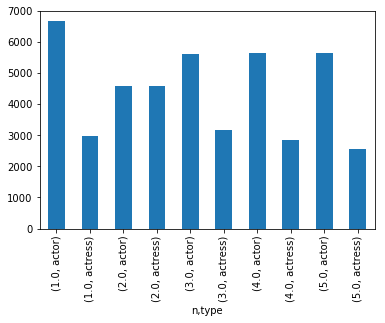

In [25]:
c = cast[(cast.year >= 1950) & (cast.year < 1960) & (cast.n >= 1) & (cast.n <= 5)]
c.groupby(["n", "type"]).size().plot(kind="bar")
#c.head()

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [29]:
cast.head()
c = cast[cast.title.str.contains("Pink Panther")]
c.groupby("title").size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        65
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     68
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [92]:
c = cast[cast.name == "Frank Oz"]
#c.sort_values("year")
f = c.groupby(["title","year"]).size()
fd = f[f >= 2]
f = fd.reset_index()
f.sort_values("year")

title  year  0
8                      The Muppet Movie  1979  8
0        An American Werewolf in London  1981  2
6                The Great Muppet Caper  1981  6
5                      The Dark Crystal  1982  2
9            The Muppets Take Manhattan  1984  7
1                      Follow That Bird  1985  3
7            The Muppet Christmas Carol  1992  7
2                Muppet Treasure Island  1996  4
3                    Muppets from Space  1999  4
4  The Adventures of Elmo in Grouchland  1999  3

### List each of the characters that Frank Oz has portrayed at least twice.

In [101]:
c = cast[cast.name == "Frank Oz"]
f = c.groupby("character").size()
foo = f[f>=2]
foo

character
Animal            6
Bert              3
Cookie Monster    4
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64